# Google Stock Forecasting Using LSTM

# Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_theme(color_codes=True)
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
df = pd.read_csv('dataset\GOOGL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


# Open

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[['Open']]
df.head()

,Open
Date,
2004-08-19,50.050049
2004-08-20,50.555557
2004-08-23,55.430431
2004-08-24,55.675674
2004-08-25,52.532532


# Data Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
#normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
#split data
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


## Data Sequencing & Train Test Splitting


In [7]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Modelling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=150, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=64)




Epoch 1/15

56/56 [==============================] - 13s 38ms/step - loss: 0.0019
Epoch 2/15
56/56 [==============================] - 2s 34ms/step - loss: 3.1931e-05
Epoch 3/15
56/56 [==============================] - 2s 33ms/step - loss: 2.9990e-05
Epoch 4/15
56/56 [==============================] - 2s 33ms/step - loss: 2.9783e-05
Epoch 5/15
56/56 [==============================] - 2s 32ms/step - loss: 2.9637e-05
Epoch 6/15
56/56 [==============================] - 2s 37ms/step - loss: 3.2775e-05
Epoch 7/15
56/56 [==============================] - 2s 33ms/step - loss: 2.8663e-05
Epoch 8/15
56/56 [==============================] - 2s 35ms/step - loss: 3.0032e-05
Epoch 9/15
56/56 [==============================] - 2s 34ms/step - loss: 2.9442e-05
Epoch 10/15
56/56 [==============================] - 2s 36ms/step - loss: 2.9161e-05
Epoch 11/15
56/56 [==============================] - 2s 35ms/step - loss: 2.8437e-05
Epoch 12/15
56/56 [==============================] - 2s 44ms/step - loss:

# Plotting Actual vs Predicted Open Price

28/28 [==============================] - 3s 12ms/step
Mean Squared Error: 5979.991691754734


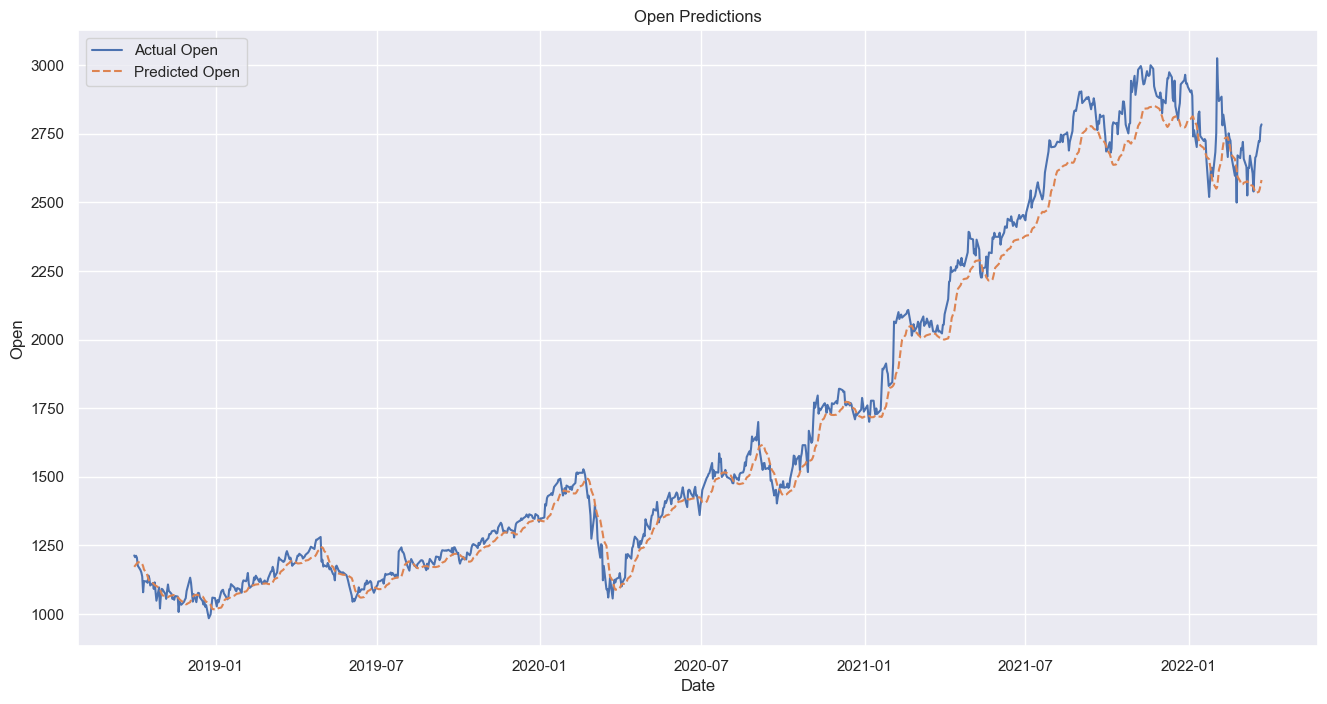

In [9]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]["Open"], predictions)
print(f'Mean Squared Error: {mse}')
#plot
plt.figure(figsize=(16,8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]["Open"], label = "Actual Open")
plt.plot(df.index[-len(predictions):], predictions, label = "Predicted Open", linestyle='dashed')
plt.title('Open Predictions')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.show()

# Forecasting Future Stock Open Prices

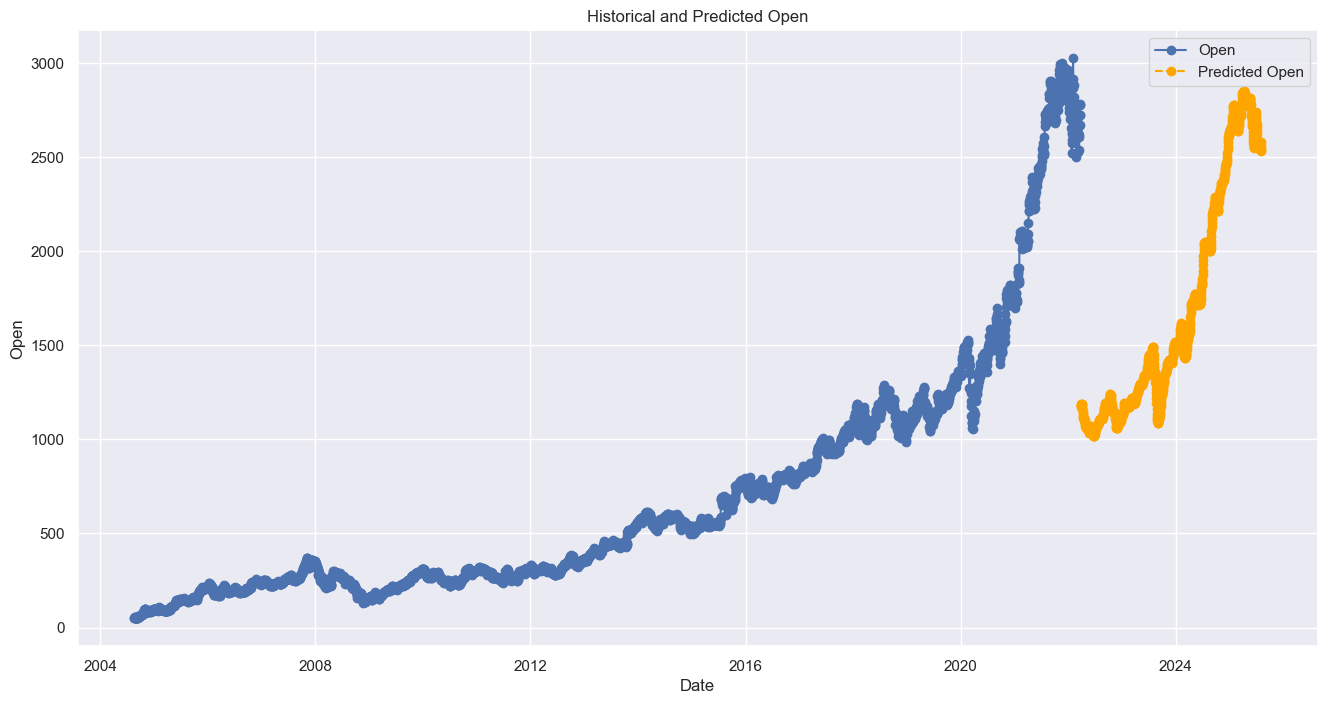

In [10]:
Open_column = 'Open'

plt.figure(figsize=(16,8))
plt.plot(df.index, df[Open_column], label='Open', marker='o', linestyle='-', color='b')

predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Open', marker='o', linestyle='dashed', color='orange')
plt.title('Historical and Predicted Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.show()

## Close

In [14]:
df = pd.read_csv('dataset\GOOGL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[['Close']]
df.head()

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055


## Data Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
#normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
#split data
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

## Data Sequencing & Train Test Splitting


In [16]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Modelling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=150, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
56/56 [==============================] - 8s 29ms/step - loss: 0.0022
Epoch 2/15
56/56 [==============================] - 2s 35ms/step - loss: 3.2905e-05
Epoch 3/15
56/56 [==============================] - 2s 34ms/step - loss: 3.1291e-05
Epoch 4/15
56/56 [==============================] - 2s 32ms/step - loss: 3.2449e-05
Epoch 5/15
56/56 [==============================] - 2s 33ms/step - loss: 3.1046e-05
Epoch 6/15
56/56 [==============================] - 2s 34ms/step - loss: 3.4303e-05
Epoch 7/15
56/56 [==============================] - 2s 34ms/step - loss: 3.0548e-05
Epoch 8/15
56/56 [==============================] - 2s 32ms/step - loss: 3.1026e-05
Epoch 9/15
56/56 [==============================] - 2s 34ms/step - loss: 2.8582e-05
Epoch 10/15
56/56 [==============================] - 2s 35ms/step - loss: 3.1790e-05
Epoch 11/15
56/56 [==============================] - 2s 32ms/step - loss: 2.9203e-05
Epoch 12/15
56/56 [==============================] - 2s 33ms/step - loss: 3.01

# Plotting Actual vs Predicted Close Price

28/28 [==============================] - 3s 15ms/step
Mean Squared Error: 8562.193221640135


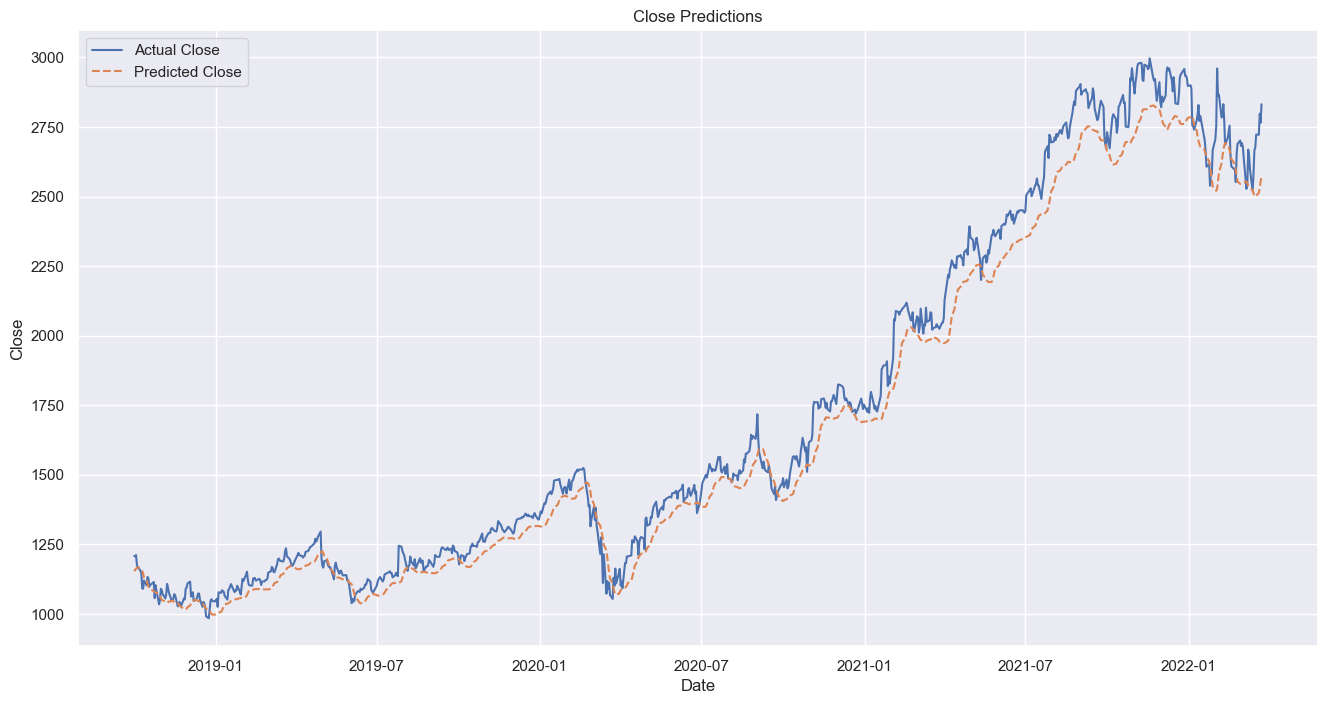

In [18]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]["Close"], predictions)
print(f'Mean Squared Error: {mse}')
#plot
plt.figure(figsize=(16,8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]["Close"], label = "Actual Close")
plt.plot(df.index[-len(predictions):], predictions, label = "Predicted Close", linestyle='dashed')
plt.title('Close Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

# Forecasting Future Stock Close Prices

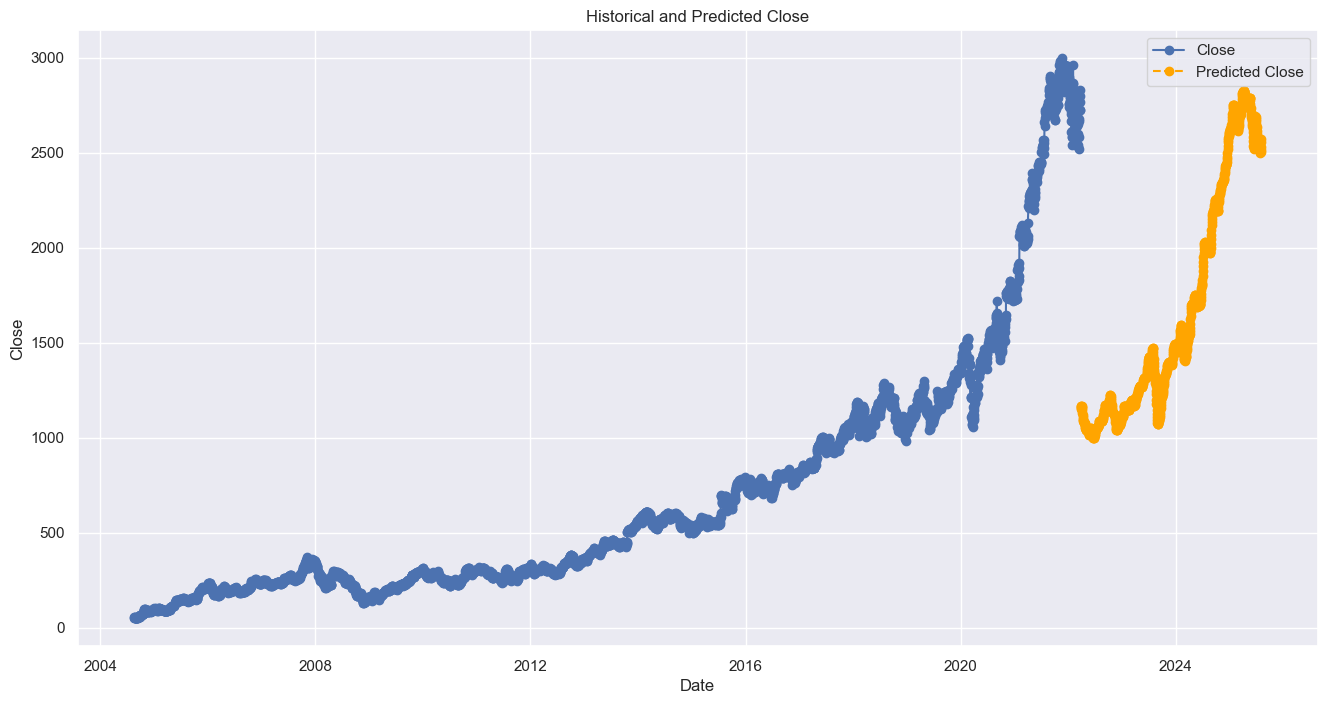

In [19]:
Close_column = 'Close'

plt.figure(figsize=(16,8))
plt.plot(df.index, df[Close_column], label='Close', marker='o', linestyle='-', color='b')

predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Close', marker='o', linestyle='dashed', color='orange')
plt.title('Historical and Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()